# RED WINE QUALITY PREDICTION ANALYSIS

# Attribute Information:
Input variables (based on Physicochemical tests):
1-fixed acidity
2-volatile acidity
3-citric acid
4-residual suger
5-chlorides
6-free sulfur dioxide
7-total sulfur dioxide
8-density
9-pH
10-sulphates
11-alcohol
Output variable(based on sensory data):
12-quality(scored between 0 and 10)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wn=pd.read_csv(r"C:\Users\Ramana Reddy (Rakhi)\OneDrive\Desktop\New folder\winequality-red (1).csv")
wn.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wn.shape

(1599, 12)

# STATISTICAL INFO

In [4]:
wn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wn.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# CHECKING THE MISSING VALUES

In [6]:
wn.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wn.duplicated().sum()

240

In [8]:
wn=wn.drop_duplicates()
wn.duplicated().sum()

0

fixed acidity               AxesSubplot(0.125,0.71587;0.168478x0.16413)
volatile acidity         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
citric acid              AxesSubplot(0.529348,0.71587;0.168478x0.16413)
residual sugar           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chlorides                  AxesSubplot(0.125,0.518913;0.168478x0.16413)
free sulfur dioxide     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
total sulfur dioxide    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
density                 AxesSubplot(0.731522,0.518913;0.168478x0.16413)
pH                         AxesSubplot(0.125,0.321957;0.168478x0.16413)
sulphates               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
alcohol                 AxesSubplot(0.529348,0.321957;0.168478x0.16413)
quality                 AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

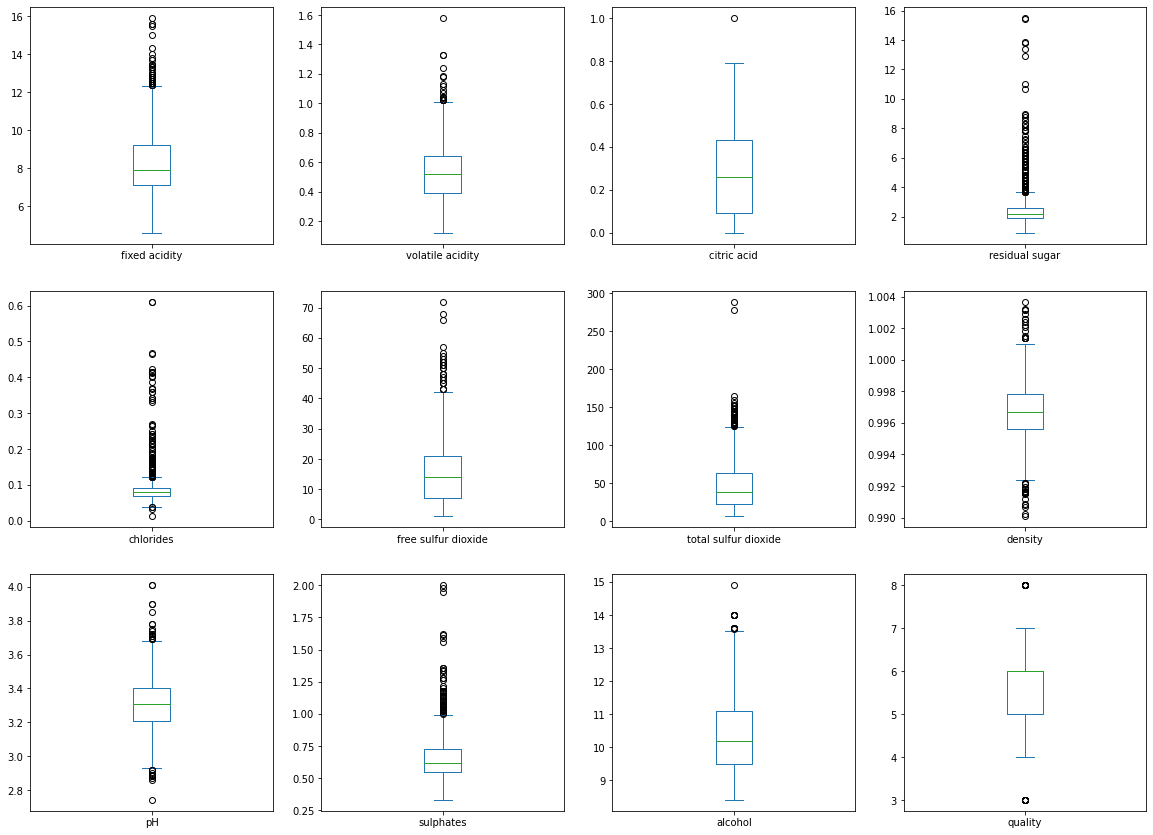

In [9]:
wn.plot(kind="box",subplots=True,sharex=False, sharey=False,layout=(4,4),figsize=(20,20))

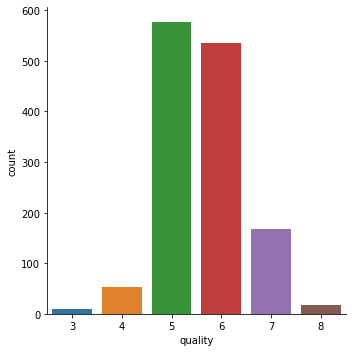

In [10]:
# number of values for each quality
sns.catplot(x="quality",data=wn,kind="count")

In [11]:
wn.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [12]:
wn.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


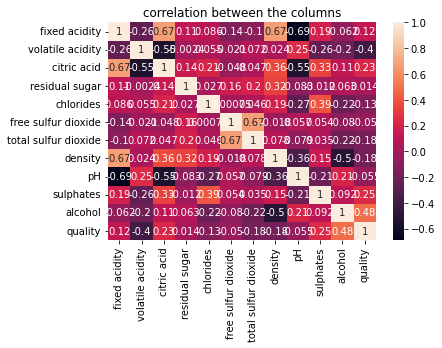

In [13]:
plt.figsize=(12,6)
sns.heatmap(wn.corr(),annot=True)
plt.title("correlation between the columns")
plt.show()

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

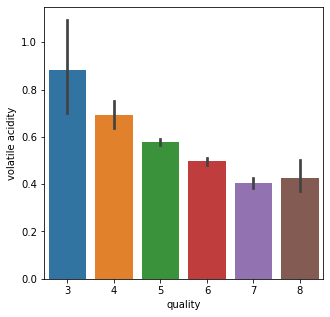

In [14]:
# volatile acidity vs Quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="volatile acidity",data=wn)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

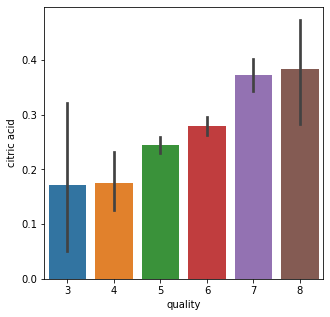

In [15]:
# citric acid vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="citric acid",data=wn)

# Splitting the data into X and Y

In [16]:
x=wn.drop("quality",axis=1)
y=wn.quality

# DATA PREPROCESSING 

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
os=SMOTE()

In [19]:
x,y=os.fit_resample(x,y)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
sts=StandardScaler()
sts.fit(x_train)
x_train_std=sts.transform(x_train)
x_test_std=sts.transform(x_test)

# LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [23]:
model=LogisticRegression()

In [24]:
model.fit(x_train,y_train)

C:\Users\Ramana Reddy (Rakhi)\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred=model.predict(x_test)
y_pred

array([8, 3, 3, 6, 7, 8, 3, 6, 7, 6, 3, 7, 6, 3, 5, 6, 8, 5, 8, 6, 5, 8,
       8, 5, 3, 6, 8, 7, 5, 4, 8, 4, 3, 3, 4, 8, 3, 6, 4, 7, 3, 6, 5, 6,
       3, 3, 8, 5, 7, 6, 8, 3, 6, 3, 7, 8, 3, 3, 6, 5, 8, 6, 8, 8, 8, 8,
       5, 6, 6, 6, 3, 8, 3, 8, 4, 4, 3, 7, 4, 5, 6, 7, 7, 3, 3, 8, 8, 3,
       8, 5, 6, 4, 6, 3, 4, 5, 8, 3, 3, 3, 5, 4, 3, 6, 4, 8, 5, 3, 3, 4,
       4, 3, 6, 6, 5, 3, 8, 5, 3, 4, 7, 4, 6, 8, 8, 4, 7, 5, 5, 8, 4, 5,
       8, 6, 8, 5, 5, 3, 8, 6, 4, 6, 7, 6, 5, 4, 5, 8, 5, 8, 5, 8, 5, 8,
       8, 5, 7, 4, 3, 8, 7, 3, 8, 7, 8, 6, 4, 4, 8, 5, 4, 5, 5, 4, 5, 5,
       8, 5, 8, 8, 7, 8, 6, 6, 5, 5, 4, 4, 6, 5, 3, 6, 3, 6, 5, 3, 8, 5,
       8, 6, 5, 4, 8, 6, 8, 4, 3, 7, 8, 8, 8, 7, 4, 5, 7, 6, 6, 6, 4, 3,
       4, 4, 4, 3, 3, 7, 8, 7, 4, 7, 4, 6, 5, 5, 4, 3, 3, 8, 4, 8, 7, 7,
       5, 8, 8, 4, 3, 3, 4, 8, 4, 5, 4, 8, 5, 6, 6, 3, 8, 8, 8, 5, 8, 5,
       8, 6, 3, 6, 6, 3, 6, 4, 4, 4, 3, 6, 8, 6, 3, 3, 8, 4, 4, 8, 6, 8,
       7, 6, 3, 8, 4, 4, 3, 3, 6, 8, 6, 4, 7, 4, 4,

In [26]:
print("test data r2 score;",r2_score(original_ytest,test_predict))

0.5007215007215007

In [27]:
confusion_matrix(y_test,y_pred)

array([[79, 27,  4, 12,  0,  0],
       [15, 56, 18,  5,  4,  0],
       [20, 20, 62, 24,  1,  1],
       [ 7, 24, 18, 35, 19, 12],
       [ 2,  7,  1, 34, 28, 48],
       [ 0,  0,  0,  6, 17, 87]], dtype=int64)

# DecisionTreeClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model1=DecisionTreeClassifier()

In [30]:
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
y1_pred=model1.predict(x_test)
y1_pred

array([7, 6, 3, 7, 8, 8, 3, 5, 8, 6, 5, 8, 3, 4, 5, 6, 8, 4, 8, 6, 6, 7,
       8, 6, 3, 7, 8, 7, 6, 3, 7, 5, 3, 4, 3, 8, 5, 5, 6, 4, 3, 6, 4, 6,
       3, 3, 8, 4, 6, 7, 7, 3, 7, 3, 8, 5, 5, 3, 4, 4, 7, 5, 8, 7, 8, 8,
       6, 6, 7, 6, 3, 8, 3, 8, 4, 7, 4, 6, 5, 5, 3, 6, 7, 4, 3, 8, 8, 6,
       7, 5, 7, 4, 7, 4, 5, 5, 8, 5, 7, 5, 5, 4, 3, 6, 4, 7, 5, 3, 3, 3,
       4, 3, 8, 7, 5, 3, 7, 4, 3, 7, 7, 3, 8, 7, 7, 6, 4, 6, 6, 8, 5, 3,
       7, 5, 8, 5, 6, 6, 7, 6, 4, 7, 8, 8, 5, 4, 4, 8, 5, 8, 6, 8, 5, 4,
       7, 5, 7, 3, 4, 7, 7, 5, 8, 7, 8, 6, 5, 4, 7, 5, 7, 6, 3, 6, 5, 4,
       7, 6, 7, 7, 8, 8, 7, 5, 5, 5, 4, 5, 3, 6, 4, 6, 3, 7, 5, 5, 8, 5,
       7, 8, 5, 3, 8, 4, 8, 4, 3, 7, 7, 7, 5, 6, 4, 5, 7, 7, 6, 6, 5, 4,
       4, 4, 4, 3, 3, 7, 7, 6, 4, 7, 4, 3, 5, 6, 3, 3, 6, 6, 7, 8, 7, 7,
       7, 8, 6, 3, 3, 4, 7, 7, 3, 5, 4, 8, 5, 6, 5, 3, 8, 8, 7, 6, 8, 5,
       7, 6, 3, 6, 3, 3, 4, 4, 6, 5, 4, 6, 4, 5, 5, 3, 8, 5, 5, 8, 6, 8,
       7, 8, 3, 8, 4, 4, 4, 3, 7, 8, 5, 5, 7, 4, 3,

In [32]:
accuracy_score(y_test,y1_pred)

0.733044733044733

# RandomForestClassifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf=RandomForestClassifier()

In [35]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
pred_rf=rf.predict(x_test)
pred_rf

array([7, 5, 3, 7, 8, 7, 3, 6, 8, 6, 5, 8, 3, 4, 5, 6, 8, 4, 8, 6, 5, 7,
       8, 5, 3, 7, 8, 7, 5, 3, 8, 5, 3, 5, 3, 8, 3, 5, 3, 4, 3, 6, 4, 7,
       3, 3, 8, 4, 7, 7, 7, 3, 7, 3, 7, 6, 3, 3, 5, 4, 7, 6, 8, 8, 8, 8,
       5, 6, 7, 6, 3, 8, 3, 8, 4, 4, 4, 4, 4, 5, 3, 7, 7, 4, 3, 8, 8, 5,
       7, 5, 6, 4, 4, 4, 5, 5, 8, 6, 7, 5, 5, 4, 3, 5, 4, 7, 5, 3, 4, 3,
       4, 3, 8, 7, 5, 3, 7, 4, 3, 5, 7, 3, 8, 7, 7, 5, 4, 5, 5, 8, 6, 3,
       7, 5, 8, 5, 6, 5, 8, 6, 4, 7, 8, 8, 5, 4, 4, 8, 5, 8, 5, 8, 5, 7,
       7, 5, 7, 3, 4, 7, 6, 4, 8, 7, 8, 7, 4, 4, 7, 6, 7, 5, 3, 6, 5, 4,
       8, 6, 8, 8, 8, 8, 7, 5, 5, 5, 4, 5, 3, 6, 4, 6, 3, 6, 5, 3, 8, 5,
       7, 8, 5, 3, 8, 6, 6, 6, 3, 7, 7, 7, 7, 8, 4, 4, 7, 7, 6, 7, 3, 6,
       4, 4, 4, 3, 4, 7, 7, 6, 4, 7, 4, 3, 5, 5, 3, 3, 6, 6, 7, 8, 7, 6,
       6, 8, 7, 3, 3, 4, 7, 8, 3, 5, 4, 8, 5, 6, 6, 3, 8, 8, 7, 5, 8, 5,
       7, 6, 3, 6, 3, 3, 4, 4, 5, 6, 4, 6, 7, 6, 6, 3, 8, 6, 5, 8, 6, 8,
       7, 8, 3, 8, 4, 4, 5, 3, 7, 8, 6, 4, 6, 4, 3,

In [37]:
accuracy_score(y_test,pred_rf)

0.8225108225108225

# SVM

In [38]:
from sklearn.svm import SVC

In [39]:
model_svc=SVC()

In [40]:
model_svc.fit(x_train,y_train)

SVC()

In [41]:
pred_svc=model_svc.predict(x_test)

In [42]:
print("test data r2 score;",r2_score(original_ytest,test_predict))

0.38961038961038963

# GradientBoostingClassifier

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
model_gb=GradientBoostingClassifier()

In [45]:
model_gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [46]:
pred_gb=model_gb.predict(x_test)

In [47]:
accuracy_score(y_test,pred_gb)

0.7474747474747475

# NOW BINARIZING THE TARGET COLUME,
#Binarization is the process of  transforming data features of any into 
vectors of binary number to make classifier algorithms

In [48]:
wn['quality']=wn.quality.apply(lambda x:1 if x>=7 else 0)

In [49]:
wn.quality.value_counts()

0    1175
1     184
Name: quality, dtype: int64

In [50]:
x=wn.drop("quality",axis=1)
y=wn.quality

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [53]:
x_train.shape,x_test.shape

((951, 11), (408, 11))

In [54]:
y_train.shape,y_test.shape

((951,), (408,))

# LogisticRegression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [56]:
model=LogisticRegression()

In [57]:
model.fit(x_train,y_train)

C:\Users\Ramana Reddy (Rakhi)\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
y_pred=model.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred)

0.8872549019607843

In [62]:
confusion_matrix(y_test,y_pred)

array([[348,   6],
       [ 40,  14]], dtype=int64)

# DecisionTreeClassifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
model1=DecisionTreeClassifier()

In [65]:
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
y1_pred=model1.predict(x_test)

In [67]:
accuracy_score(y_test,y1_pred)

0.8284313725490197

In [70]:
confusion_matrix(y_test ,y1_pred)

array([[312,  42],
       [ 28,  26]], dtype=int64)

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
from sklearn import tree
from sklearn.tree import plot_tree

In [73]:
wn.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [74]:
feature_name=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

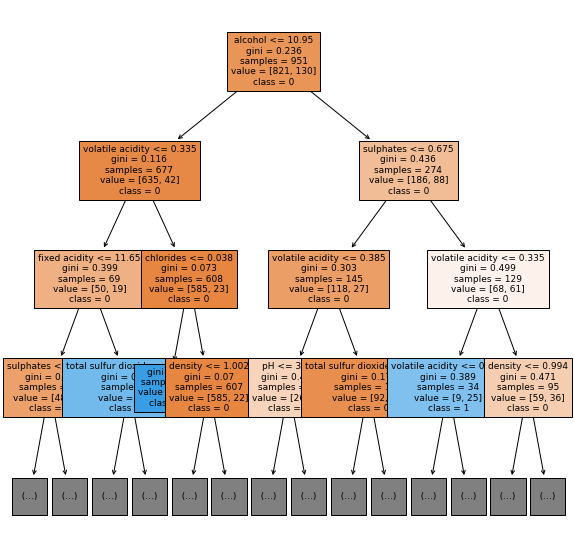

In [75]:
plt.figure(figsize=(10,10))
a=plot_tree(model1,max_depth=3,fontsize=9,feature_names=feature_name,class_names=['0','1'],filled=True)
plt.show()

# KNeighborsClassifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
model_knn=KNeighborsClassifier(n_neighbors=5)

In [78]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [79]:
y_predknn=model_knn.predict(x_test)

In [80]:
accuracy_score(y_test,y_predknn)

0.8651960784313726

In [83]:
confusion_matrix(y_test,y_predknn)

array([[340,  14],
       [ 41,  13]], dtype=int64)

In [84]:
score=[]
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_knn=knn.predict(x_test)
    accuracy_score(y_test,pred_knn)
    score.append(accuracy_score(pred_knn,y_test))
print(score,"\n")

print(max(score))

[0.821078431372549, 0.8725490196078431, 0.8627450980392157, 0.8799019607843137, 0.8651960784313726, 0.8725490196078431, 0.8627450980392157, 0.8578431372549019, 0.8529411764705882, 0.8578431372549019, 0.8602941176470589, 0.8676470588235294, 0.8700980392156863, 0.875, 0.875, 0.8700980392156863, 0.8700980392156863, 0.8651960784313726, 0.8676470588235294, 0.8651960784313726, 0.8651960784313726, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294] 

0.8799019607843137


Text(0, 0.5, 'accuracy_score')

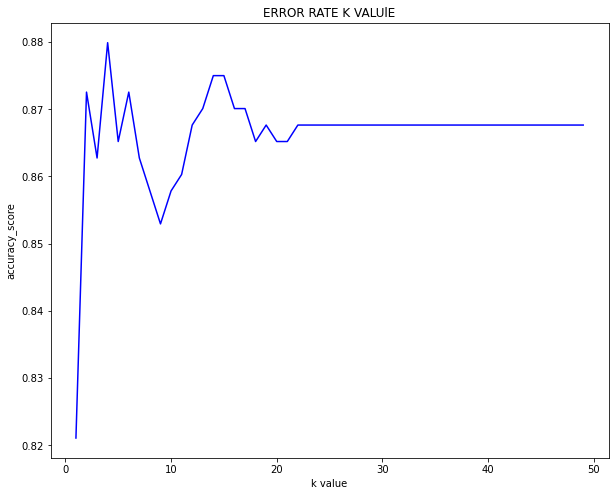

In [85]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50),score,color="blue")
plt.title("ERROR RATE K VALUlE")
plt.xlabel("k value")
plt.ylabel("accuracy_score")

# naive_bayes

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
model_nb=GaussianNB()

In [88]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [89]:
pred_gnb=model_nb.predict(x_test)

In [90]:
accuracy_score(y_test,pred_gnb)

0.8431372549019608

In [92]:
confusion_matrix(y_test,pred_gnb)

array([[306,  48],
       [ 16,  38]], dtype=int64)

# SVM

In [93]:
from sklearn.svm import SVC

In [94]:
model_svc=SVC()

In [95]:
model_svc.fit(x_train,y_train)

SVC()

In [96]:
pred_svc=model_svc.predict(x_test)

In [97]:
accuracy_score(y_test,pred_svc)

0.8700980392156863

# RandomForestClassifier

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rf=RandomForestClassifier()

In [100]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [101]:
pred_rf=rf.predict(x_test)

In [102]:
accuracy_score(y_test,pred_rf)

0.9093137254901961

In [103]:
confusion_matrix(y_test,pred_rf)

array([[347,   7],
       [ 30,  24]], dtype=int64)

# GradientBoostingClassifier

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

In [105]:
model_gb=GradientBoostingClassifier()

In [106]:
model_gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [107]:
pred_gb=model_gb.predict(x_test)

In [108]:
accuracy_score(y_test,pred_gb)

0.8921568627450981

# Conclusion

In [ ]:
LogisticeRegression: 
    
    accuracy_score:0.8872549019607843     0.8050314465408805

DecisionTree:
    
    accuracy_score :0.8284313725490197     0.9748427672955975
    
knn:
    
    accuracy_score:0.8651960784313726     0.949685534591195
    
naive_bayes:
    
    accuracy_score:0.8431372549019608      0.7232704402515723
    
SVM:
    
    accuracy_score:0.8700980392156863       0.9559748427672956
    
Random forest:
    
    accuracy_score:0.9093137254901961 #HIGHEST ACCURACY_SCORE  0.9779874213836478
    
GradientBoosting:
    
    accuracy_score:0.8921568627450981     0.9842767295597484
